# Tasks

Machine Learning and Statistics

winter 23/24

Jamie Roche
***

In [40]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import sklearn.decomposition as dec
import seaborn as sns

### Task 1

 > Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such as `math`. In this task,1 you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package
>
> Rather, you should use the Newton’s method. Start with initial guess for the square root called `z0`. You then repeatedly improve it using the following formula, until the difference between
some previous guess zi and the next zi+1 is less than some threshold, say `0.01`.



$$ z_{i+1} = z_i - \frac{z_i × z_i-x}{2z_i}$$

~~ https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

~~ https://docs.document360.com/docs/how-to-center-align-the-text-in-markdown

In [41]:
def sqrt(x):
    # inital guess
    z = x/4.0

    # loop until reasonable accurate guess is achieved 
    
    while ((z*z-x)>0.000000001):
        
        z = z - (((z*z)-x)/(2*z))

    return z

In [42]:
# Test Function 
num = 90
y = sqrt(num)
y

9.486832980511155

In [43]:
# compare differnece between python and newtons 

abs((num**0.5)-y)


6.016520615048648e-12

End Task 1 - Improve answer later 

# Task 2

>Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. 
>
>Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an asociation between drink preference and biscuit preference in this instance.


| Drink   | Chocolate | Plain |
|---------|-----------|-------|
| Coffee  | 43        | 57    |
| Tea     | 56        | 45    |


Formula for the Chi-squared test:

$$ x^2 = \Sigma \frac{(O_i - E_i)^2}{E_i}$$


In [44]:
# people who like Coffee and Choclate Biscuits
countCChoc = 43
coffee_choc = [['Coffee', 'Chocolate']] * countCChoc

# People who like Tea and Chocolaye 
countTChoc = 56
tea_choc = [['Tea', 'Chocolate']] * countTChoc

# People who like Coffe and Plain
countCPlain = 57
Coffee_plain = [['Coffee', 'Plain']] * countCPlain

# People who like Tea and Plain
CountTplain = 45
tea_plain = [['Tea', 'Plain']] * CountTplain


In [45]:
# Complie the data together 
raw_data = coffee_choc + tea_choc + Coffee_plain + tea_plain

# Shuffle data to give the appearance of randomness 
random.shuffle(raw_data)

raw_data


[['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffe

In [46]:
# create the data frame to perform tests on 
Drink, Biscuit =list(zip(*raw_data))
df = pd.DataFrame({'Drink': Drink, 'Biscuit': Biscuit})

# preform cross tab contingency
ct = ss.contingency.crosstab(df['Drink'],df['Biscuit'])

first,second = ct.elements

df[df['Drink']==first[0]]

,Drink,Biscuit
2,Coffee,Plain
3,Coffee,Chocolate
6,Coffee,Plain
8,Coffee,Chocolate
11,Coffee,Chocolate
...,...,...
193,Coffee,Chocolate
194,Coffee,Plain
196,Coffee,Plain
197,Coffee,Chocolate


In [47]:
results = ss.chi2_contingency(ct.count, correction=False)

results

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [48]:
results.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

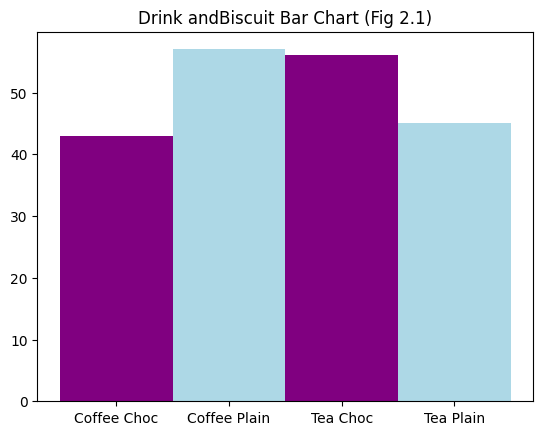

In [49]:
#https://www.w3schools.com/python/matplotlib_bars.asp
#https://stackoverflow.com/questions/20454120/how-to-remove-gaps-between-bars-in-a-bar-chart 

# create a bar chart to visulise the data
xC = np.array(["Coffee Choc","Coffee Plain"])
xT = np.array(["Tea Choc","Tea Plain"])
yC = np.array([countCChoc,countCPlain])
yT = np.array([countTChoc,CountTplain])
colour = ["purple","lightBlue"]
plt.bar(xC,yC,width=1.0,color=colour)
plt.bar(xT,yT,width=1.0,color=colour)
plt.title('Drink andBiscuit Bar Chart (Fig 2.1)')
plt.show()

In [50]:
# https://people.richland.edu/james/lecture/m170/tbl-chi.html
# https://www.youtube.com/watch?v=HKDqlYSLt68
dof = 1
#for a 5% significance level according to the Chi Square table, result should be 3.841 or less
Significance_level = 3.841

# Manually calculate Sum of the observed values - expected values
Chi2 = ((((43-49.254)**2)/49.254)+(((57-50.746)**2)/50.746)+(((56-49.746)**2)/49.746)+(((45-51.254)**2)/51.254))
Chi2

3.114204911145081

To reject the null hypothesis the value of the significane level - the actual level should be a negative number. 
Meaning the 

In [51]:
Significance_level - Chi2 

0.7267950888549191

In [52]:
print (99/201) # proportion of people who prefer chocolate, drink does not matter, 
print (102/201) # proportion of people who prefer Plain, drink does not matter, 

0.4925373134328358
0.5074626865671642


### Observations

Although the results initially appear to suggest there is a correlation between drink type and preferred biscuit. 
There is not enough evidence to reject the null hypothesis for a five percent significance level. At a glance, Drink and Biscuit Bar Chart (Fig 2.1) might lead one to believe of an existing correlation. 

In this instance, for a five percent significance level, with one degree of freedom the statistic produced by the chi square test would have to be greater than 3.841. The actual statistic was found to be 3.1139, and the P value was 0.0776.

This is not enough evidence to determine there is a correlation between drink and biscuit choice. 
Thus, the null hypothesis cannot be rejected for this set of data.


# Create graph and argue the data shows there is a relationship between drink and bicuit 

# Task 3

>Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

In [53]:
#read url https://bobbyhadz.com/blog/read-csv-file-from-url-using-python
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

df = pd.read_csv(url,sep=',',encoding='utf-8',)

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [54]:
# Take just Gentoo Penguins
allGentoo = df[df["species"]=="Gentoo"]

In [55]:
# Take just male gentoo for sample a
sample_a = allGentoo[allGentoo["sex"]=="MALE"]["body_mass_g"].to_numpy()

sample_a

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

In [56]:
# Take just females for sample b
sample_b = allGentoo[allGentoo["sex"]=="FEMALE"]["body_mass_g"].to_numpy()

sample_b

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

In [57]:
#https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page#:~:text=If%20a%20p%2Dvalue%20reported,then%20the%20result%20is%20insignificant.
# run t-test
ss.ttest_ind(sample_a,sample_b)  

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

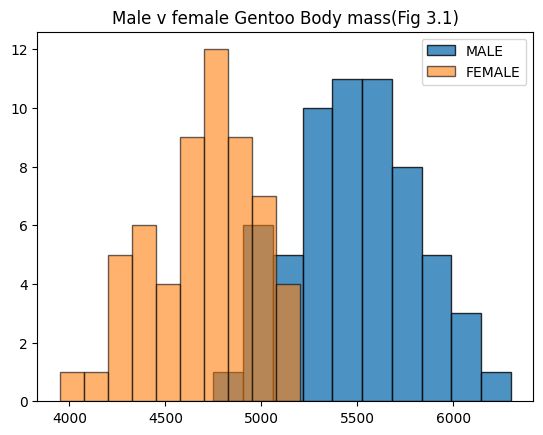

In [58]:
# https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/ 

# Create a histogram to visulise the difference in the data sets for male and female
plt.hist(sample_a, label="MALE",alpha=.8,edgecolor="Black")
plt.hist(sample_b,label="FEMALE",alpha=.6,edgecolor="Black")
plt.legend()
plt.title('Male v female Gentoo Body mass(Fig 3.1)')
plt.show() 

### Obersrvations 

This test is to investigate if there is a discrepancy in the body mass difference between Male and Female Gentoo penguins.
Using the T-Test we can see the P value is approximately 2.133e-28. This is a quite small number. 

For the P value to suggest there is enough evidence to show there is a substantial difference in the mean of the body masses of both Male and Female Gentoo Penguins the P value would have to be less than 0.05 This would give us a 95% confidence in the distinguish between both sexes. 

As we have received a p value of approximately 2.133e-28 this confirms the null hypothesis can be rejected, and evidence shows there is a difference in this data. This difference can be visualised in Male v female Gentoo Body mass (Fig 3.1).
There is a small overlap for larger females and smaller males, but it can be noted there is some distance between the mean of both Male and Female penguins. Confirming the rejection of the null hypothesis theory and suggesting the difference between the sexes. 


# Task 4

 Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


In [59]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


df = pd.read_csv(url,sep=',',encoding='utf-8',)
df_NoNA = df.dropna()

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [60]:
clf = KNeighborsClassifier()

X1 = df_NoNA[['sepal_length','sepal_width']]
X2 =df_NoNA[['petal_length','petal_width']]



In [61]:
Y=df_NoNA['species']
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X1,Y) 

clf.fit(X_train,y_train)

res = clf.predict(X_test) == y_test

res

31      True
43      True
55      True
99      True
12      True
86     False
114    False
49      True
44      True
45      True
36      True
95      True
51     False
123     True
104    False
70     False
93      True
145    False
117     True
52     False
63      True
121    False
26      True
97     False
136     True
88      True
77      True
62     False
68     False
37      True
80      True
106    False
90      True
10      True
100     True
69      True
78     False
60      True
Name: species, dtype: bool

In [63]:
cross_val_score(clf,X1,Y,cv=5)


array([0.73333333, 0.73333333, 0.76666667, 0.83333333, 0.73333333])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


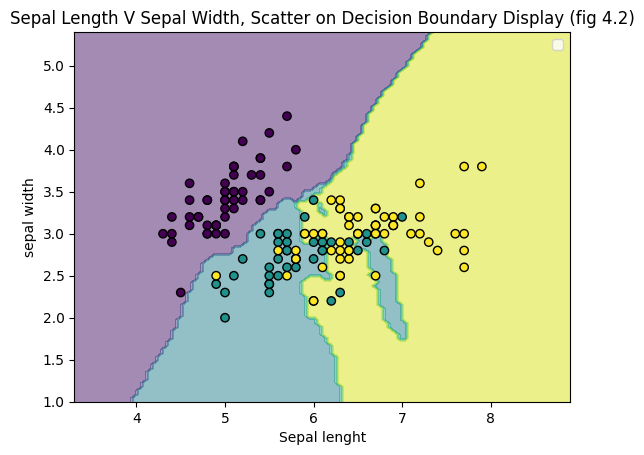

In [64]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X1, response_method="predict",
    xlabel="Sepal lenght", ylabel="sepal width",
    alpha=0.5,
)
disp.ax_.scatter(X1['sepal_length'], X1['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('Sepal Length V Sepal Width, Scatter on Decision Boundary Display (fig 4.2)')
plt.show()

In [65]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,Y) # 23

clf.fit(X2_train,y2_train)

res2 = clf.predict(X2_test) == y2_test

res2

7       True
52      True
97      True
119    False
46      True
72      True
18      True
94      True
85      True
109     True
96      True
26      True
2       True
142     True
86      True
17      True
143     True
71      True
113     True
134     True
41      True
65      True
30      True
75      True
43      True
87      True
88      True
12      True
145     True
66      True
139     True
28      True
89      True
39      True
58      True
131     True
77     False
20      True
Name: species, dtype: bool

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


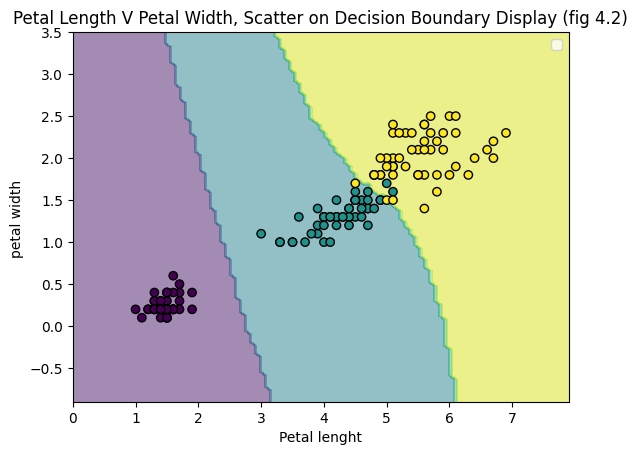

In [66]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X2, response_method="predict",
    xlabel="Petal lenght", ylabel="petal width ",
    alpha=0.5,
)
disp.ax_.scatter(X2['petal_length'], X2['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.legend()
plt.title('Petal Length V Petal Width, Scatter on Decision Boundary Display (fig 4.2)')
plt.show()

In [67]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
IrisSetosaGroup = df[df["species"].isin(['setosa'])]


In [68]:
IrisVersicolorGroup = df[df["species"].isin(['versicolor'])]


In [69]:
IrisVirginicaGroup = df[df["species"].isin(['virginica'])]


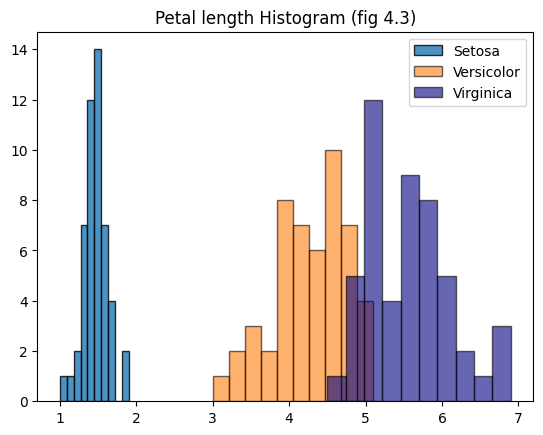

In [70]:
# https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/ 
plt.hist(IrisSetosaGroup['petal_length'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['petal_length'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['petal_length'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Petal length Histogram (fig 4.3)')
plt.show() 

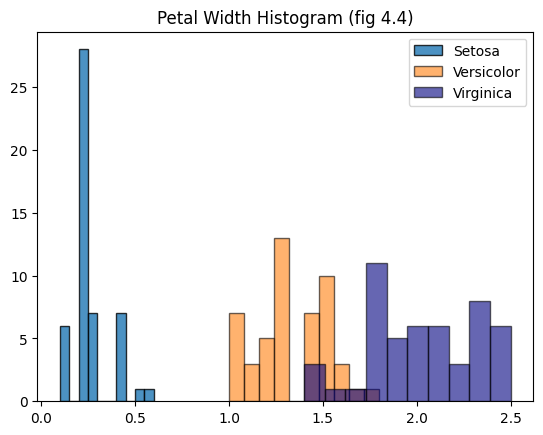

In [71]:
# https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/ 
plt.hist(IrisSetosaGroup['petal_width'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['petal_width'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['petal_width'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Petal Width Histogram (fig 4.4)')
plt.show() 

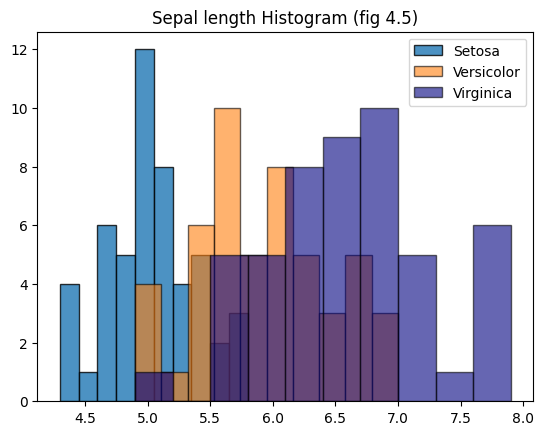

In [72]:
# https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/ 
plt.hist(IrisSetosaGroup['sepal_length'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['sepal_length'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['sepal_length'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Sepal length Histogram (fig 4.5)')
plt.show() 

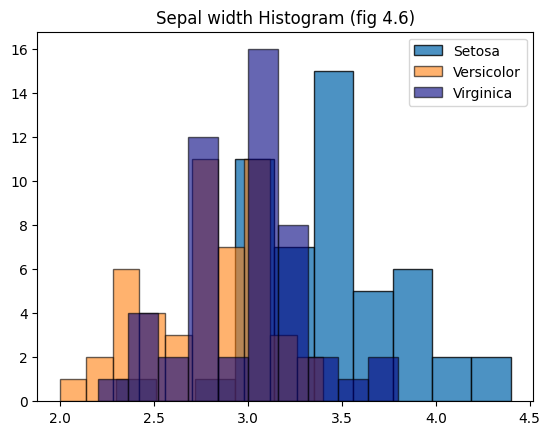

In [73]:
# https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/ 
plt.hist(IrisSetosaGroup['sepal_width'], label="Setosa",alpha=.8,edgecolor="Black")
plt.hist(IrisVersicolorGroup['sepal_width'],label="Versicolor",alpha=.6,edgecolor="Black")
plt.hist(IrisVirginicaGroup['sepal_width'],label="Virginica",alpha=.6,color = "navy",edgecolor="Black")
plt.legend()
plt.title('Sepal width Histogram (fig 4.6)')
plt.show() 

# Task 5

Perform Principal Component Analysis on the iris data set
reducing the number of dimensions to two. Explain the purpose
of the analysis and your results

In [74]:
df = pd.read_csv(url,sep=',',encoding='utf-8',)
df_NoNA = df.dropna()

pca = dec.PCA(n_components=2)

x = df[['sepal_length', 'sepal_width', 'petal_length',  'petal_width']]
scaler = StandardScaler()

scaler.fit(x)

StandardScaler()

In [75]:
x_transform = scaler.transform(x)

TDF = pd.DataFrame(x_transform, columns=['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

pca.fit(TDF)

x_pca = pca.transform(TDF)

df_pca = pd.DataFrame(df[["species"]])
df_pca["pca0"] = x_pca[:,0]
df_pca["pca1"] = x_pca[:,1]

In [76]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


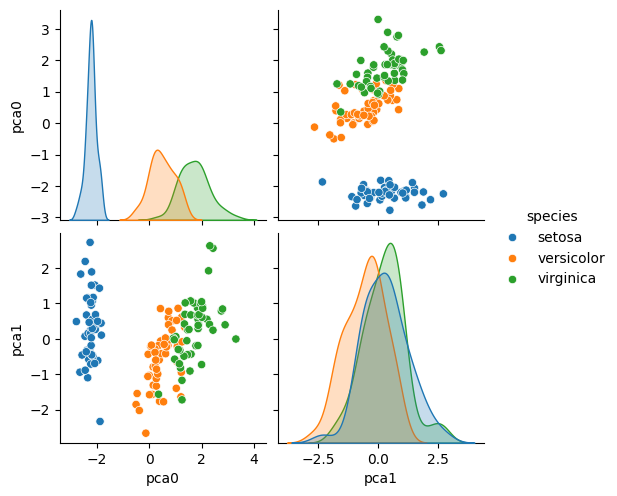

In [78]:
sns.pairplot(df_pca,hue = "species")

## with out scaling

In [79]:
df = pd.read_csv(url,sep=',',encoding='utf-8',)
df_NoNA = df.dropna()

pca = dec.PCA(n_components=2)

x = df[['sepal_length', 'sepal_width', 'petal_length',  'petal_width']]


In [80]:
TDF2 = pd.DataFrame(x, columns=['sepal_length', 'sepal_width', 'petal_length',  'petal_width'])

pca.fit(TDF2)

x_pca2 = pca.transform(TDF2)

df_pca2 = pd.DataFrame(df[["species"]])
df_pca2["pca0"] = x_pca2[:,0]
df_pca2["pca1"] = x_pca2[:,1]

In [81]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


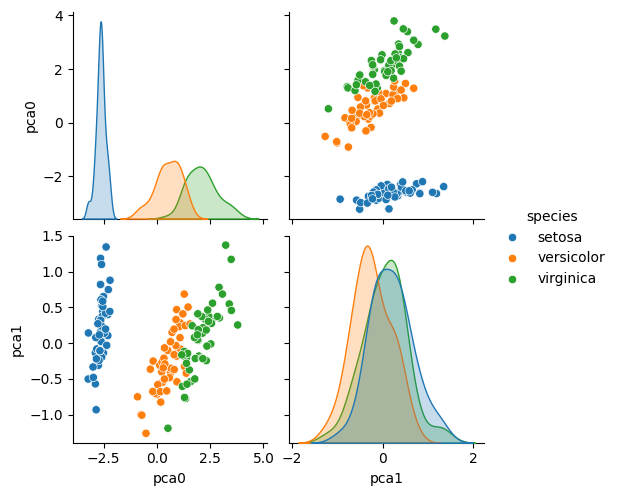

In [82]:
sns.pairplot(df_pca2,hue = "species")